In [1]:
import numpy as np
import seaborn as sns

In [19]:
large_size = (71, 71)
small_size = (7, 7)

input_small = """5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0"""

with open("input.txt") as f:
    input_large = f.read()

start = (0, 0)


def parse_input(input: str, n_lines: None | int = None) -> list(tuple[int, int]):
    lines = input.splitlines()
    if n_lines is not None:
        lines = lines[:n_lines]
    return [tuple(map(int, line.split(","))) for line in lines]


252

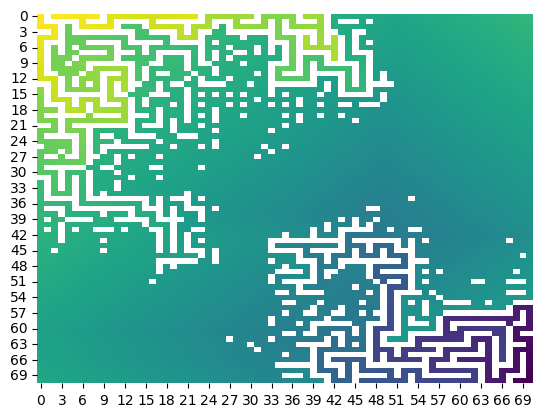

In [65]:
from collections import deque
from dataclasses import dataclass
from typing import Iterable


@dataclass
class State:
    x: int
    y: int
    steps: int


def dfs(
    start: tuple[int, int],
    end: tuple[int, int],
    forbidden: Iterable[tuple[int, int]],
    size: tuple[int, int],
) -> bool:
    forbidden = set(forbidden)
    # travel from end to start filling the minimum number of steps to reach end
    stack = deque([State(*end, 0)])
    pos_to_steps = {end: 0}
    best_steps = float("inf")
    while stack:
        state = stack.popleft()
        if state.x == start[0] and state.y == start[1]:
            best_steps = min(best_steps, state.steps)
            # we have already reached the start, no more movements
            continue
        # prune if we already have a better path
        if state.steps >= best_steps:
            continue
        for dx, dy in ((0, 1), (1, 0), (0, -1), (-1, 0)):
            new_x, new_y = state.x + dx, state.y + dy
            # check if we are out of bounds
            if new_x < 0 or new_x >= size[0] or new_y < 0 or new_y >= size[1]:
                continue
            # check if we are in a forbidden cell
            if (new_x, new_y) in forbidden:
                continue
            new_pos = (new_x, new_y)
            # prune if we have already reached this cell with equal less steps
            if new_pos in pos_to_steps and pos_to_steps[new_pos] <= (state.steps + 1):
                continue
            new_state = State(*new_pos, state.steps + 1)
            pos_to_steps[new_pos] = new_state.steps
            stack.append(new_state)

    return best_steps, pos_to_steps


def part1(
    corrupted: list[tuple[int, int]], n_lines, size: tuple[int, int], plot: bool = False
) -> int:
    corrupted = corrupted[:n_lines]
    end = tuple([x - 1 for x in size])
    best_steps, pos_to_steps = dfs(start, end, corrupted, size)
    if plot:
        maze = np.zeros(size, dtype=float) * np.nan
        # set to -1 all values in corrupted
        for x, y in corrupted:
            maze[x, y] = np.nan
        # set to best_steps all values in pos_to_steps
        for (x, y), steps in pos_to_steps.items():
            maze[x, y] = steps
        sns.heatmap(maze, annot=False, fmt=".0f", cmap="viridis", cbar=False)
    return best_steps


corrupted = parse_input(input_large)
part1(corrupted, 1024, size=large_size, plot=True)

## Part 2

Binary search

[2237, 3450]
[2843, 3450]
[2843, 3145]
[2994, 3145]
[2994, 3068]
[3031, 3068]
[3031, 3048]
[3031, 3038]
[3034, 3038]
[3034, 3035]
Position (5, 60) is the first one that makes the maze imposible with 3035 corrupted cells


inf

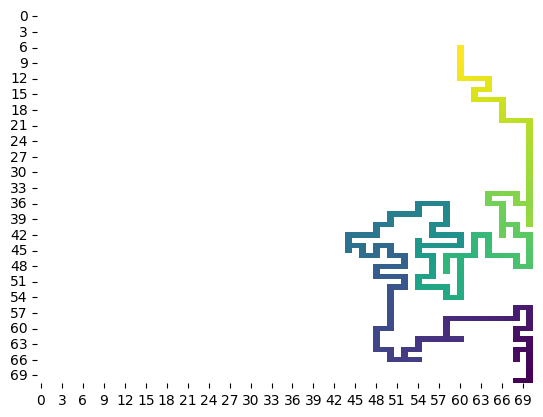

In [78]:
def find_min_nlines_imposible(corrupted, size: tuple[int, int]) -> int:
    init_range = (1024, len(corrupted))
    range = list(init_range)
    while range[1] > range[0] + 1:
        mid = (range[0] + range[1]) // 2
        n_steps = part1(corrupted, mid, size=size)
        if n_steps == float("inf"):
            range[1] = mid - 1
        else:
            range[0] = mid
        print(range)
    # notice that when slicing we need to use range[1] + 1
    return range[0] + 1, corrupted[range[0]]


min_n_lines, postion = find_min_nlines_imposible(corrupted, size=large_size)
print(
    f"Position {postion} is the first one that makes the maze imposible with {min_n_lines} corrupted cells"
)

part1(corrupted, min_n_lines, size=large_size, plot=True)